In [2]:
import numpy as np
from dipy.io.streamline import load_trk
from dipy.tracking import utils
from dipy.tracking.streamline import Streamlines
from dipy.io.image import load_nifti
import copy
import matplotlib.pyplot as plt

In [6]:
#set path
#path to trk
mypath = '/Users/alex/code/Wenlin/data/wenlin_results/'
#path to csv connectivity file
outpath = '/Users/alex/code/Wenlin/preprocessing/results/'
labels_path = '/Users/alex/code/Wenlin/data/wenlin_data/labels/fa_labels_warp_N54900_RAS.nii.gz'
runno = 'N54900'

In [7]:
#load label information
labels, affine_labels = load_nifti(labels_path)

#transform labels
labels_ = copy.copy(labels)
nonz = np.nonzero(labels)
for i in range(len(nonz[0])):
    if labels_[nonz[0][i], nonz[1][i], nonz[2][i]] >= 1000:
        labels_[nonz[0][i], nonz[1][i], nonz[2][i]] -= 1000
        labels_[nonz[0][i], nonz[1][i], nonz[2][i]] += 166
print(runno + ' label transformation finished')

N54900 label transformation finished


In [9]:
#load streamlines
streamlines, header = load_trk(mypath+runno+'_bmCSA_detr_small.trk')


#remove the small streamlines
streamlines_cut = lambda: (sl for sl in streamlines if len(sl)>1)
streamlines = Streamlines(streamlines_cut())

print(runno + ' streamlines paparation finished')

N54900 streamlines paparation finished


In [10]:
#build the connectivity matrix
M= utils.connectivity_matrix(streamlines, labels_, affine=affine_labels,
                                        return_mapping=False,
                                        mapping_as_streamlines=False)
#fill dialgonal with 0
np.fill_diagonal(M,0)
M=M[1:,1:]
print(runno+ ' connectivity matrix building finished')

N54900 connectivity matrix building finished


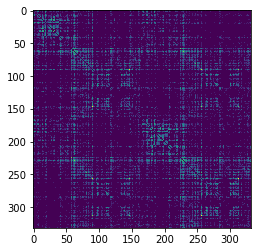

In [12]:
plt.imshow(np.log1p(M))

In [11]:
np.diag(M)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
np.savetxt(outpath+'t1.csv', M, fmt='%.0e', delimiter=',')

In [23]:
import scipy.io as scio

In [ ]:
scio.loadmat('')